In [18]:
# 202022
import numpy as np
import tensorflow as tf

# print(tf.__version__) # 1.15.0

# 입력 이미지 (4차원으로 표현)
# (이미지 개수, width, height, color)
# (1, 3, 3, 1) = > (이미지 1개, 가로 3pixel, 세로 3pixel, color수 1)

image = np.array([[[[1],
                  [1],
                  [1]],
                  [[1],
                  [1],
                  [1]],
                  [[1],
                  [1],
                  [1]]]], dtype=np.float32)
                 
print(image.shape) # (1, 3, 3, 1)

# filter를 적용할 건데
# 필터의 가로 길이, 세로 길이, 필터의 channel, 필터의 개수
# (2, 2, 1, 5)
weight = np.array([
                   [[[1, 2, 3, 4, 5]],
                   [[1, 2, 3, 4, 5]]],
                   [[[1, 2, 3, 4, 5]],
                   [[1, 2, 3, 4, 5]]]
                  ])
print(weight.shape) # (2, 2, 1, 5)

# stride = 1
# Padding = VALID (padding 사용 x)

result = tf.nn.conv2d(image,
                      weight, 
                      strides=[1, 1, 1, 1],
                      padding = 'VALID')

sess = tf.Session()
conv2d = sess.run(result)
print(conv2d.shape)  # (1, 2, 2, 5)

(1, 3, 3, 1)
(2, 2, 1, 5)
(1, 2, 2, 5)


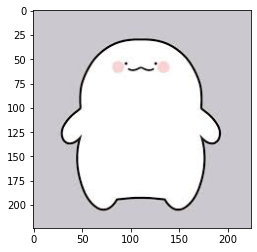

이미지의 크기 : (224, 224)
X : 120, Y : 80의 픽셀값은 : [255 255 255]
(224, 224, 3)


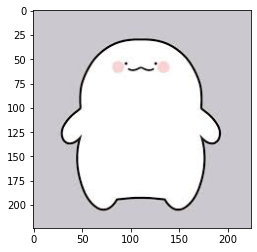

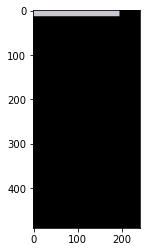

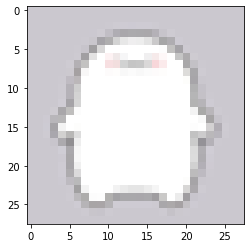

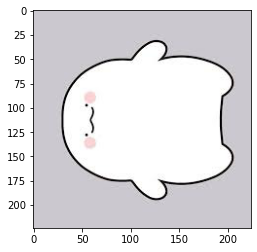

C:\Users\j828h\anaconda3\envs\data_env\lib\site-packages\ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in ubyte_scalars


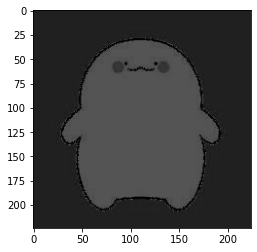

(224, 224, 3)
(224, 224, 1)


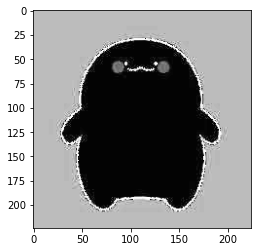

In [34]:
# 202023
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# 이미지 불러들이기
img = Image.open('./images/a.jpg')

plt.imshow(img)
plt.show()

# pixel 데이터를 ndarray로 뽑아낸다.
pixel = np.array(img)

print('이미지의 크기 : {}'.format(img.size)) # tuple 형태로 image size 리턴

# 특정 위치의 pixel 값을 알아본다.
# print('X : {}, Y : {}의 픽셀값은 : {}'.format(1200, 800, pixel[800, 1200]))
print('X : {}, Y : {}의 픽셀값은 : {}'.format(120, 80, pixel[80, 120]))

# pixel의 shape를 찍어본다.
print(pixel.shape) # (224, 224, 3)

pixel[80, 120] = [255, 255, 255] # 흰색

plt.imshow(pixel)
plt.show()

# img 처리 기본

# 1. 이미지 저장
img.save('./images/my_picture.jpg')
# 이미지 객체 정보를 이용하여 파일 생성

# 2. 이미지 crop
crop_image = img.crop((30, 210, 270, 700))
plt.imshow(crop_image)
plt.show()

# 3. 이미지 resize
resize_img = img.resize((int(img.size[0]/8), int(img.size[1]/8) ))
plt.imshow(resize_img)
plt.show()

# 4. 이미지 회전
rotate_img = img.rotate(90)
plt.imshow(rotate_img)
plt.show()

# 5. 원래의 이미지를 흑백으로 처리한다.
#  (R, G, B) 3원색으로 표현 => color가 잘 나온다.
#  각 필셀의 RGB 값을 지금 가지고 있는 RGB 평균으로 바꾸어 흑백처리 한다.
#  (10, 20, 30) => (20, 20, 20) 변경하여 흑백 사진으로 바꾼다.
grey_pixel = pixel.copy()
for y in range(grey_pixel.shape[0]):
    for x in range(grey_pixel.shape[1]):
        grey = int((grey_pixel[y, x, 0] + grey_pixel[y, x, 1] + grey_pixel[y, x, 2])/3)
        grey_pixel[y, x, 0] = grey
        grey_pixel[y, x, 1] = grey
        grey_pixel[y, x, 2] = grey
        
plt.imshow(grey_pixel)
plt.show()

print(grey_pixel.shape)  # (224, 224, 3) 3차원 채널 세개
print(grey_pixel[:,:,0:1].shape) # (224, 224, 1) 3차원 채널 하나

plt.imshow(grey_pixel[:,:,0:1], cmap='Greys')
plt.show()

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
ori_imag의 shape: (183, 275, 3)
input_image shape : (1, 183, 275, 3)
변경된 input_image shape: (1, 183, 275, 1)
weight.shape: (3, 3, 1, 1)
결과 데이터의 shape : (1, 181, 273, 1)
t_img.shape: (181, 273, 1)


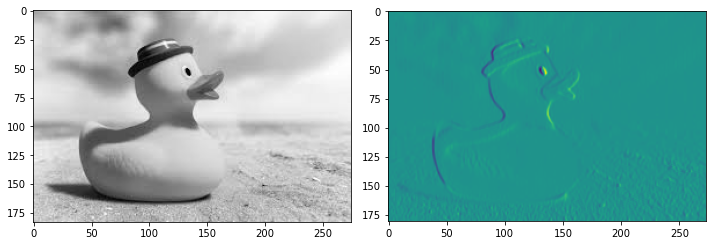

In [54]:
%reset

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
# matplolibt의 image 처리 module
import matplotlib.image as img

# sub plot을 2개 만든다.
# 원본 / convolution 결과 이미지 2개를 띄운다.

fig = plt.figure(figsize=(10, 10)) # 가로 10인치, 세로 10인치

ax1 = fig.add_subplot(1, 2, 1) # 1, 2는 행과 열을 의미. 마지막 1은 그 중 몇번째 인지
ax2 = fig.add_subplot(1, 2, 2)

ori_img = img.imread('./images/wb.jpg')
ax1.imshow(ori_img)

print('ori_imag의 shape: {}'.format(ori_img.shape)) 
# ori_imag의 shape: (183, 275, 3)
# 흑백이지만 3차원, 가로/세로 순서 바뀜

# convolution 연산을 수행하려면 4차원이 필요
# 이미지가 3차원 + 그런 이미지가 여러 장 이니까 4차원으로 표현
# 현재 shape : (183, 275, 3) 
# (이미지 개수, height, weight, color) 형식으로 convolution 입력으로 넣는다.
input_image = ori_img.reshape((1,) + ori_img.shape)
print('input_image shape : {}'.format(input_image.shape))
# input_image shape : (1, 183, 275, 3)
input_image = input_image.astype(np.float32) # 정수형 ndarry를 실수형으로 변환

# 입력 이미지의 color 수를 변경 -> channel을 1로 변경
input_image = input_image[:,:,:, :1]
    # 첫, 둘, 세번째 차원은 다 가지고 오고, 마지막 차원만 1개 가져옴 [:,:,:,:1]
print('변경된 input_image shape: {}'.format(input_image.shape))
# 변경된 input_image shape: (1, 183, 275, 1)

# filter를 준비한다.
# filter : (filter height, filter width, filter channel, filter 개수)
# filter는 정방형, height = width
# filter는 정방형 중에서도 3x3을 많이 사용
# filter : (3, 3, 1, 1)

weight = np.array([[[[-1]], [[0]], [[1]]], 
                    [[[-1]], [[0]], [[1]]], 
                    [[[-1]], [[0]], [[1]]]])
print('weight.shape: {}'.format(weight.shape))
# weight.shape: (3, 3, 1, 1)

sess = tf.Session()

con2d = tf.nn.conv2d(input_image,
                     weight,
                     strides=[1, 1, 1, 1],
                     padding='VALID') 
# VALID -> padding x, 사이즈 줄어든다.
result = sess.run(con2d)

print('결과 데이터의 shape : {}'.format(result.shape)) 
# 결과 데이터의 shape : (1, 181, 273, 1)
# (이미지 개수, height, width, filter 개수)

t_img = result[0, :,:,:]   # 0번째-> 1 에 대해서 모든 것
print('t_img.shape: {}'.format(t_img.shape)) 
# t_img.shape: (181, 273, 1) # 3차원
ax2.imshow(t_img)

fig.tight_layout()
plt.show()
# 가로 보다는 세로 선이 더 잘 표현된다.

In [56]:
# Pooling 처리

import numpy as np
import tensorflow as tf

# 입력이미지
# (1, 4, 4, 1) => (이미지개수, height, width, channel)
image = np.array([[[[1],[1],[1],[1]],
                 [[1],[1],[1],[1]],
                 [[1],[1],[1],[1]],
                 [[1],[1],[1],[1]]]], dtype=np.float32)
print(image.shape)

# pooling??
pool = tf.nn.max_pool(image, 
                      ksize=[1,2,2,1],
                      strides=[1,2,2,1],
                      padding='VALID')

sess = tf.Session()
result = sess.run(pool)

print(result.shape)

(1, 4, 4, 1)
(1, 2, 2, 1)


Once deleted, variables cannot be recovered. Proceed (y/[n])? ㅛ
Once deleted, variables cannot be recovered. Proceed (y/[n])? y
ori_img의 shape : (183, 275, 3)
input_image shape : (1, 183, 275, 3)
변경된 input_image shape : (1, 183, 275, 1)
weight.shape: (3, 3, 1, 1)
결과 데이터의 shape : (1, 181, 273, 1)
(181, 273, 1)
(1, 90, 136, 1)


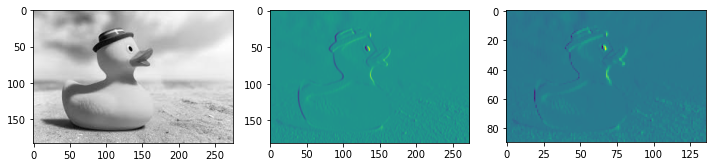

In [61]:
### 원본이미지 -> convolution처리 -> pooling처리
### 각각의 이미지를 subplot으로 화면에 출력
### 이미지 3장을 출력

%reset

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as img

# sub plot을 3개 만들어 보아요!

fig = plt.figure(figsize=(10,10))  # 가로 10인치, 세로 10인치

ax1 = fig.add_subplot(1,3,1)  # 1,3은 행과 열을 의미, 마지막 1인 그 중 몇번째인지를 의미
ax2 = fig.add_subplot(1,3,2)  
ax3 = fig.add_subplot(1,3,3)  

ori_img = img.imread('./images/wb.jpg')
ax1.imshow(ori_img)
print('ori_img의 shape : {}'.format(ori_img.shape))
# ori_img의 shape : (183, 275, 3)

# convolution 연산을 수행하려면 4차원이 필요하다.
# 이미지가 3차원 + 3차원 이미지 여러장 => 4차원
# 현재 shape : (183, 275, 3)
# (이미지 개수, height, weight, color) 형식으로 convolution 입력으로 넣는다.
input_image = ori_img.reshape((1, ) + ori_img.shape)
print('input_image shape : {}'.format(input_image.shape))
input_image = input_image.astype(np.float32)  # 정수형 ndarray를 실수형으로 변환

# 입력이미지의 color수를 변경 -> channel을 1로 변경
input_image = input_image[:,:,:,:1]
print('변경된 input_image shape : {}'.format(input_image.shape))

# filter를 준비한다.
# filter : (filter height, filter width, filter channel, filter 개수)
# filter는 정방형, height = width
# filter는 정방형 중에서도 3x3을 많이 사용
# filter : (3, 3, 1, 1)

weight = np.array([[[[-1]], [[0]], [[1]]], 
                    [[[-1]], [[0]], [[1]]], 
                    [[[-1]], [[0]], [[1]]]])
print('weight.shape: {}'.format(weight.shape))
# weight.shape: (3, 3, 1, 1)

sess = tf.Session()

con2d = tf.nn.conv2d(input_image,
                     weight,
                     strides=[1,1,1,1],
                     padding='VALID')

result = sess.run(con2d)

print('결과 데이터의 shape : {}'.format(result.shape)) 
# 결과 데이터의 shape : (1, 181, 273, 1)

t_img = result[0,:,:,:]
print(t_img.shape)
ax2.imshow(t_img)

pool = tf.nn.max_pool(result, 
                      ksize=[1,2,2,1],
                      strides=[1,2,2,1],
                      padding='VALID')

sess = tf.Session()
result = sess.run(pool)

print(result.shape)

t_img = result[0,:,:,:]
ax3.imshow(t_img)

fig.tight_layout()
plt.show()